In [16]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from keybert import KeyBERT


# Preprocessing

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/arsyadCode/My_Thesis/main/Program/Data/Update/Scopus.csv')

In [18]:
nlp = spacy.load('en_core_web_sm') 

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    words = [token.text for token in doc if 
                len(token) > 2 and
                token.pos_ not in ['VERB', 'ADJ', "GPE", "ADP", "NUM", "AUX", "ADV"] and
                token.lemma_ and 
                not token.is_stop and
                not token.is_digit and 
                not token.is_currency and 
                not token.is_space
            ]
    return ' '.join(words)

# Melakukan preprocessing pada kolom 'abstrak'
df['Abstrak'] = df['Abstract'].apply(preprocess_text)
data = df['Abstrak']

In [19]:
display(data.head())

0    covid19 pandemic course economy world indonesi...
1    government announcement public line paris agre...
2    carbon storage peat ecosystems thousands years...
3    sector energyconsuming districts countries emi...
4    interventions forests deforestation forest deg...
Name: Abstrak, dtype: object

In [20]:
def extract_keywords(sentence):
    doc = nlp(sentence)
    keywords = [str(token.text.lower()) for token in doc if token.lemma_]
    return keywords

# def extract_keywords2(sentence):
#     doc = nlp(sentence)
#     keywords2 = [str(token.text.lower()) for token in doc if not token.is_stop]
#     return keywords2

keywords_array = []
# keywords_array2 = []

# Similiar with Unigram
for _, row in df.iterrows():
    sentence = row['Abstrak']
    keywords = extract_keywords(sentence)
    keywords_array.extend(keywords)

# for _, row in df.iterrows():
#     sentence = row['Abstract']
#     keywords = extract_keywords(sentence)
#     keywords_array.extend(keywords)

# keywords_list2 = pd.DataFrame(list(set(keywords_array2)))
keywords_list = pd.DataFrame(list(set(keywords_array)))
# abstract_count2 = Counte(keywords_array2)
abstract_count = Counter(keywords_array)

result_dict = {key: abstract_count[key] for key in keywords_array if key in abstract_count}
sorted_result = dict(sorted(result_dict.items(), key=lambda item: (item[1], item[0])))
# result_dict2 = {key: abstract_count2[key] for key i keywords_array2 if key in abstract_count2}
# sorted_result2 = dict(sorted(result_dict2.items(), key=lambda item: (item[1], item[0])))

In [21]:
display(abstract_count)
abstract_count

Counter({'emissions': 678,
         'indonesia': 460,
         'energy': 417,
         'greenhouse': 382,
         'gas': 371,
         'study': 339,
         'ghg': 314,
         'carbon': 302,
         'emission': 300,
         'oil': 283,
         'palm': 251,
         'co2': 237,
         'production': 231,
         'climate': 229,
         'change': 207,
         'forest': 188,
         'results': 183,
         'land': 177,
         'research': 169,
         'development': 157,
         'impact': 156,
         'data': 152,
         'use': 149,
         'soil': 137,
         'power': 129,
         'countries': 126,
         'ch4': 125,
         'rice': 125,
         'water': 122,
         'peat': 121,
         'system': 120,
         'area': 113,
         'management': 110,
         'analysis': 106,
         'ltd': 106,
         'impacts': 106,
         'factors': 103,
         'consumption': 102,
         'industry': 102,
         'method': 101,
         'gases': 96,
         'mod

Counter({'emissions': 678,
         'indonesia': 460,
         'energy': 417,
         'greenhouse': 382,
         'gas': 371,
         'study': 339,
         'ghg': 314,
         'carbon': 302,
         'emission': 300,
         'oil': 283,
         'palm': 251,
         'co2': 237,
         'production': 231,
         'climate': 229,
         'change': 207,
         'forest': 188,
         'results': 183,
         'land': 177,
         'research': 169,
         'development': 157,
         'impact': 156,
         'data': 152,
         'use': 149,
         'soil': 137,
         'power': 129,
         'countries': 126,
         'ch4': 125,
         'rice': 125,
         'water': 122,
         'peat': 121,
         'system': 120,
         'area': 113,
         'management': 110,
         'analysis': 106,
         'ltd': 106,
         'impacts': 106,
         'factors': 103,
         'consumption': 102,
         'industry': 102,
         'method': 101,
         'gases': 96,
         'mod

In [22]:
import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    doc = nlp(text)
    words = [token.text for token in doc if 
                len(token) > 2 and
                token.pos_ not in ['VERB', 'ADJ', "GPE", "ADP", "NUM", "AUX", "ADV"] and
                token.lemma_ and 
                not token.is_stop and
                not token.is_digit and 
                not token.is_currency and 
                not token.is_space
            ]
    return words

# Example usage with text from "Lord of the Flies"
lotf_text = df['Abstract'][0]

preprocessed_words = preprocess_text(lotf_text)

# Extract and print the pos_ values of the tokens
pos_values = [(token.text, token.pos_) for token in nlp(lotf_text)]
print(pos_values)
print(preprocessed_words)


[('The', 'DET'), ('covid-19', 'PROPN'), ('pandemic', 'ADJ'), ('has', 'AUX'), ('altered', 'VERB'), ('the', 'DET'), ('course', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('economy', 'NOUN'), ('all', 'ADV'), ('over', 'ADP'), ('the', 'DET'), ('world', 'NOUN'), (',', 'PUNCT'), ('including', 'VERB'), ('Indonesia', 'PROPN'), ('.', 'PUNCT'), ('Government', 'NOUN'), ('policy', 'NOUN'), ('to', 'PART'), ('resort', 'VERB'), ('to', 'ADP'), ('social', 'ADJ'), ('restriction', 'NOUN'), ('and', 'CCONJ'), ('working', 'VERB'), ('from', 'ADP'), ('home', 'NOUN'), ('has', 'AUX'), ('increased', 'VERB'), ('household', 'NOUN'), ('consumption', 'NOUN'), ('of', 'ADP'), ('energy', 'NOUN'), ('but', 'CCONJ'), ('reduce', 'VERB'), ('the', 'DET'), ('commercial', 'ADJ'), ('use', 'NOUN'), ('of', 'ADP'), ('energy', 'NOUN'), ('.', 'PUNCT'), ('Economic', 'ADJ'), ('growth', 'NOUN'), ('is', 'AUX'), ('greatly', 'ADV'), ('affected', 'VERB'), ('by', 'ADP'), ('the', 'DET'), ('pandemic', 'ADJ'), ('and', 'CCONJ'), ('had', 'AUX'), ('s

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/arsyadCode/My_Thesis/main/Program/Data/Update/Scopus.csv')

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    words = [token.text for token in doc if 
                len(token)>2 and
                token.pos_ and
                token.lemma_ and
                not token.is_stop
                not in ['VERB', 'ADJ', "GPE", "ADP", "NOUN"] and 
                not token.is_digit and 
                not token.is_currency and 
                not token.is_space and 
                not token.text.isnumeric()
            ]
    return ' '.join(words)

# Melakukan preprocessing pada kolom 'abstrak'
df['Abstrak'] = df['Abstract'].apply(preprocess_text)
data = df['Abstrak']

In [24]:
keywords_list

,0
0,kalimantan
1,proponents
2,equilibrium
3,udf
4,pathways
...,...
4272,aalborg
4273,soilwater
4274,mha
4275,retailer


# K-Means Clustering

In [25]:
vectorizer = TfidfVectorizer(max_features=len(df['Abstrak']))
X = vectorizer.fit_transform(df['Abstrak'])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

num_clusters_range = range(1, 11)
inertia_values = []

for num_clusters in num_clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(num_clusters_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Nilai K')
plt.ylabel('Inertia')
# plt.title('Elbow Plot untuk menentukan Cluster K-Means')
plt.xticks(num_clusters_range)
plt.grid(True)
plt.show()

ValueError: empty vocabulary; perhaps the documents only contain stop words

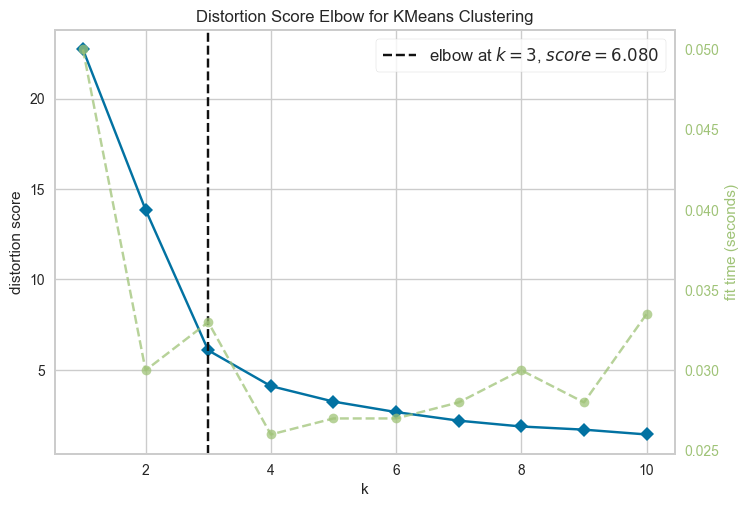

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))
visualizer.fit(X_pca)
visualizer.show()

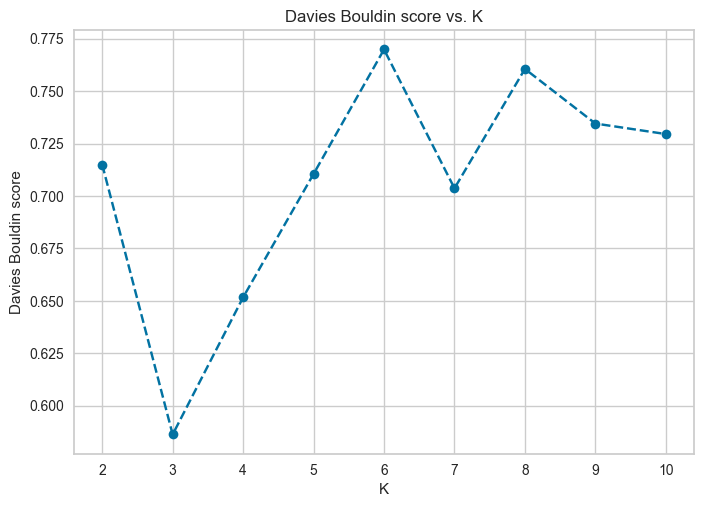

In [ ]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(data)
    score = davies_bouldin_score(data, model)
    return score

# Perform PCA on the data before clustering
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

scores = []
centers = list(range(2, 11))
for center in centers:
    scores.append(get_kmeans_score(X_pca, center))

plt.plot(centers, scores, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Davies Bouldin score')
plt.title('Davies Bouldin score vs. K')
plt.show()

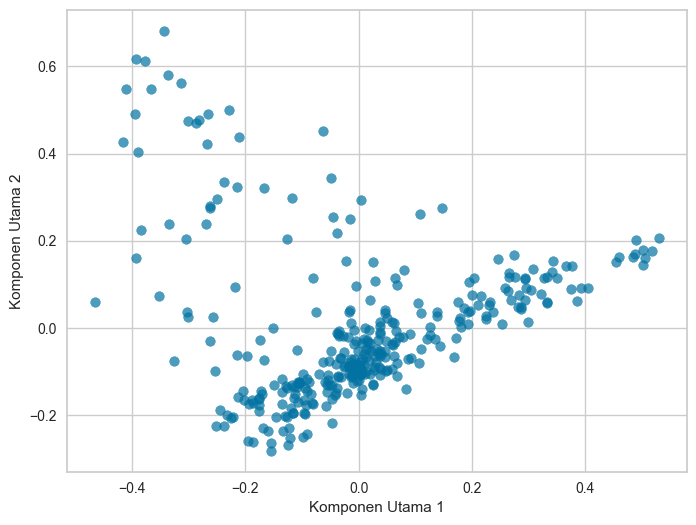

In [ ]:
# Visualisasi PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
# plt.title('Visualisasi klaster hasil dari PCA')
plt.grid(True)
plt.show()

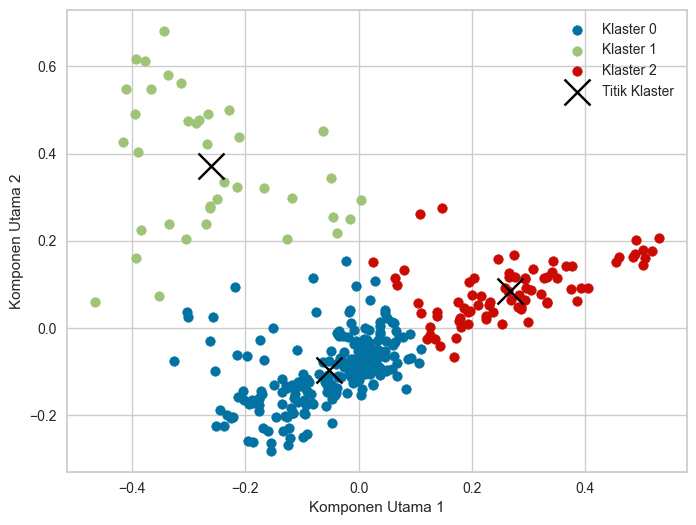

In [ ]:
num_clusters = 3  # Setelah didapatkan pada proses sebelumnya
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_pca)

cluster_labels = kmeans.labels_
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Define a color palette
color_palette = sns.color_palette("Set1", n_colors=num_clusters)
cluster_colors = [color_palette[label] for label in cluster_labels]

plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = X_pca[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Klaster {i}', c=cluster_colors)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=350, c='black', label='Titik Klaster')

# for i, abstract in enumerate(df['Abstrak']):
#     plt.text(X_pca[i, 0], X_pca[i, 1], f"{i+1}")

plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
# plt.title('Klasterisasi Pewarnaan dengan K-Means')
plt.legend()
plt.grid(True)
plt.show()

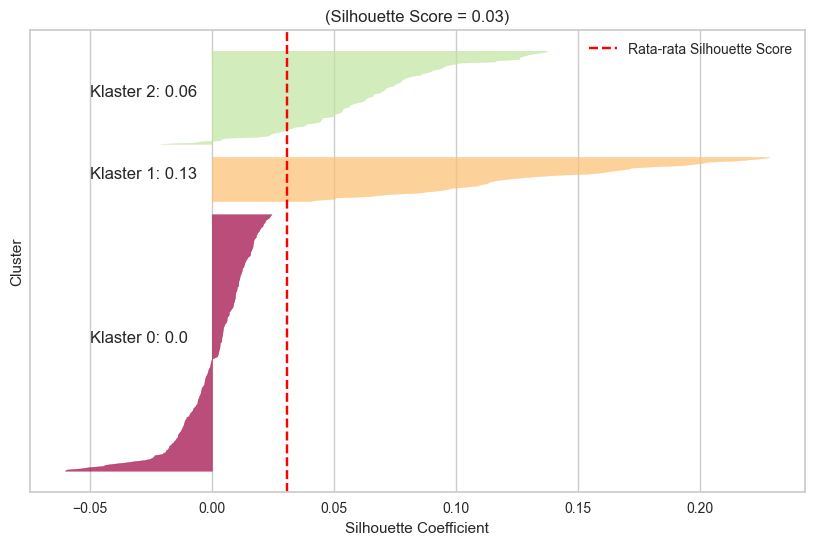

In [ ]:
#Visualisasi Silhouette Clusters Plot

silhouette_avg = silhouette_score(X.toarray(), cluster_labels)
silhouette_values = silhouette_samples(X.toarray(), cluster_labels)

plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(num_clusters):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cluster_colors[i]
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, f"Klaster {i}: {round(np.mean(ith_cluster_silhouette_values), 2)}")
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label="Rata-rata Silhouette Score")

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
# plt.title("Silhouette Plot untuk K-Means Clustering (Silhouette Score = " + str(round(silhouette_avg, 2)) + ")")
plt.title("(Silhouette Score = " + str(round(silhouette_avg, 2)) + ")")
plt.legend()
plt.yticks([])
plt.show()

In [ ]:
# Hasil kata kunci berdasarkan hasil K-Means Clustering
vectorizer = TfidfVectorizer(max_features=len(keywords_list))  
X = vectorizer.fit_transform(data)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

keywords_per_cluster = {}
for i in range(num_clusters):
    cluster_data = [data[j] for j in range(len(data)) if cluster_labels[j] == i]
    cluster_text = ' '.join(cluster_data)
    cluster_vectorizer = TfidfVectorizer()
    cluster_X = cluster_vectorizer.fit_transform([cluster_text])
    feature_names = cluster_vectorizer.get_feature_names_out()
    tfidf_scores = cluster_X.toarray()[0]
    sorted_indices = np.argsort(tfidf_scores)[::-1]

    N = 20  #Total kata kunci yang diinginkan setiap cluster
    keywords = [feature_names[idx] for idx in sorted_indices[:N]]
    keywords_per_cluster[i] = keywords

for i in range(num_clusters):
    print(f"Cluster {i} Keywords: {', '.join(keywords_per_cluster[i])}")

Cluster 0 Keywords: emissions, indonesia, greenhouse, carbon, ghg, study, emission, gas, climate, change, forest, co2, land, research, results, rice, production, data, soil, peat
Cluster 1 Keywords: oil, palm, emissions, indonesia, production, gas, industry, greenhouse, biodiesel, study, ghg, land, soil, impact, forest, carbon, change, supply, plantations, ch4
Cluster 2 Keywords: energy, indonesia, emissions, power, gas, electricity, co2, study, greenhouse, production, emission, consumption, generation, ghg, system, coal, development, plant, use, countries


In [ ]:
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=len(keywords_list))  
X = vectorizer.fit_transform(data)

# PCA dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# K-Means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Create a DataFrame to store cluster data
cluster_df = pd.DataFrame({'Text': data, 'Cluster': kmeans.labels_})

# Calculate total data points in each cluster
cluster_counts = cluster_df['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Total']
cluster_df = cluster_df.merge(cluster_counts, on='Cluster')

# Save cluster data to CSV
cluster_df.to_csv('clustered_data.csv', index=False)

# Teori Luhn

In [ ]:
# Read the clustered data from CSV
clustered_data = pd.read_csv('clustered_data.csv')

# Separate data into clusters
cluster_data = [[] for _ in range(num_clusters)]
for i in range(num_clusters):
    cluster_indices = clustered_data[clustered_data['Cluster'] == i].index
    for idx in cluster_indices:
        cluster_data[i].extend(clustered_data.loc[idx, 'Text'].split())

cluster_data_unigrams = [' '.join(words) for words in cluster_data]

# Create variables for each cluster's unigrams
cluster_0_unigrams = cluster_data_unigrams[0]
cluster_1_unigrams = cluster_data_unigrams[1]
cluster_2_unigrams = cluster_data_unigrams[2]

# Display the total count of words in each cluster
for i, unigrams in enumerate(cluster_data_unigrams):
    print(f"Cluster {i} Total Unigrams: {len(unigrams.split())} Words")


Cluster 0 Total Unigrams: 5127
Cluster 1 Total Unigrams: 4051
Cluster 2 Total Unigrams: 21106


In [ ]:
import pandas as pd
from collections import Counter

# Read the clustered data from CSV
clustered_data = pd.read_csv('clustered_data.csv')

# Separate data into clusters
cluster_data = [[] for _ in range(num_clusters)]
for i in range(num_clusters):
    cluster_indices = clustered_data[clustered_data['Cluster'] == i].index
    for idx in cluster_indices:
        cluster_data[i].extend(clustered_data.loc[idx, 'Text'].split())

# Create a dictionary to store word frequencies for each cluster
word_frequencies = {}
for i, words in enumerate(cluster_data):
    word_count = Counter(words)
    sorted_word_freq = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
    word_frequencies[f'Cluster {i}'] = sorted_word_freq

# Display word frequencies for each cluster
for cluster, frequencies in word_frequencies.items():
    print(f"{cluster} Word Frequencies:")
    print(frequencies)


Cluster 0 Word Frequencies:
{'energy': 324, 'power': 95, 'emissions': 90, 'indonesia': 88, 'gas': 79, 'electricity': 73, 'co2': 67, 'greenhouse': 56, 'consumption': 55, 'emission': 53, 'generation': 50, 'production': 49, 'study': 45, 'efficiency': 40, 'plant': 39, 'countries': 38, 'carbon': 38, 'development': 37, 'system': 37, 'ghg': 35, 'coal': 33, 'reduction': 32, 'impact': 32, 'use': 31, 'data': 30, 'research': 29, 'policy': 27, 'sources': 25, 'results': 25, 'resources': 24, 'method': 24, 'demand': 23, 'paper': 23, 'fuel': 23, 'potential': 23, 'government': 22, 'analysis': 22, 'capacity': 22, 'plants': 22, 'biomass': 22, 'fossil': 21, 'cost': 20, 'fuels': 20, 'performance': 20, 'oil': 19, 'authors': 19, 'climate': 19, 'factors': 18, 'technology': 18, 'change': 17, 'biogas': 17, 'growth': 16, 'sector': 16, 'ltd': 16, 'model': 15, 'value': 15, 'utilization': 14, 'iop': 14, 'country': 14, 'rights': 13, 'supply': 13, 'licence': 13, 'publishing': 13, 'capita': 13, 'nations': 13, 'industr

In [ ]:
import pandas as pd
from collections import Counter

# Read the clustered data from CSV
clustered_data = pd.read_csv('clustered_data.csv')

# Separate data into clusters
cluster_data = [[] for _ in range(num_clusters)]
for i in range(num_clusters):
    cluster_indices = clustered_data[clustered_data['Cluster'] == i].index
    for idx in cluster_indices:
        cluster_data[i].extend(clustered_data.loc[idx, 'Text'].split())

# Create a dictionary to store word frequencies for each cluster
word_frequencies = {}
for i, words in enumerate(cluster_data):
    word_count = Counter(words)
    sorted_word_freq = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
    word_frequencies[f'Cluster {i}'] = sorted_word_freq

# Save word frequencies for each cluster to CSV files
for cluster, frequencies in word_frequencies.items():
    df = pd.DataFrame(frequencies.items(), columns=['Word', 'Frequency'])
    csv_filename = f'cluster_{cluster}.csv'
    df.to_csv(csv_filename, index=False)
    print(f"Saved {csv_filename}")

Saved cluster_Cluster 0.csv
Saved cluster_Cluster 1.csv
Saved cluster_Cluster 2.csv


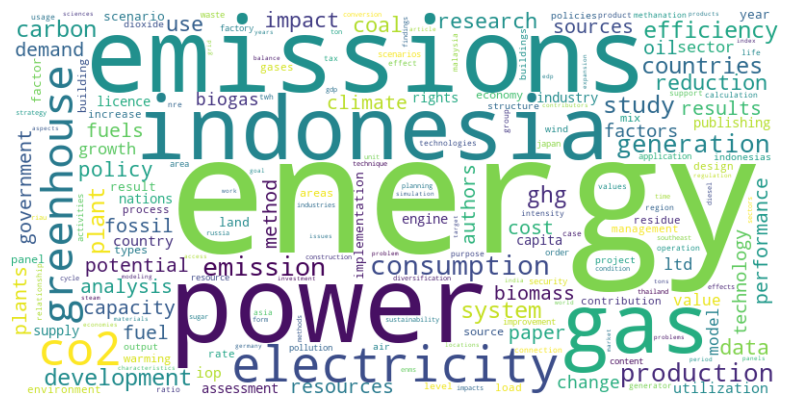

In [ ]:
# Visualisasi WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies['Cluster 0'])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

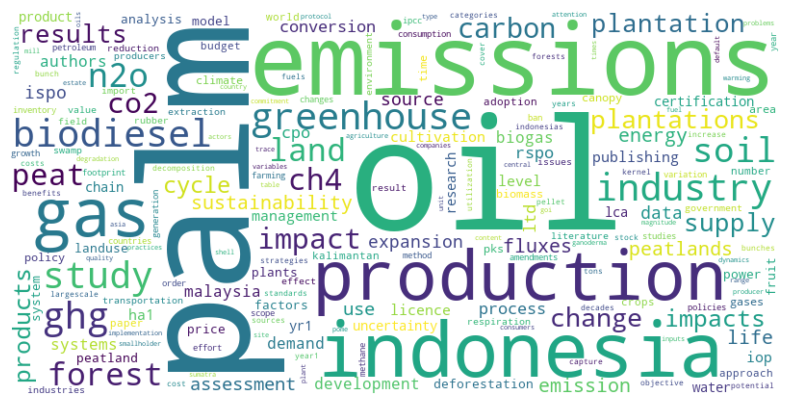

In [ ]:
# Visualisasi WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies['Cluster 1'])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

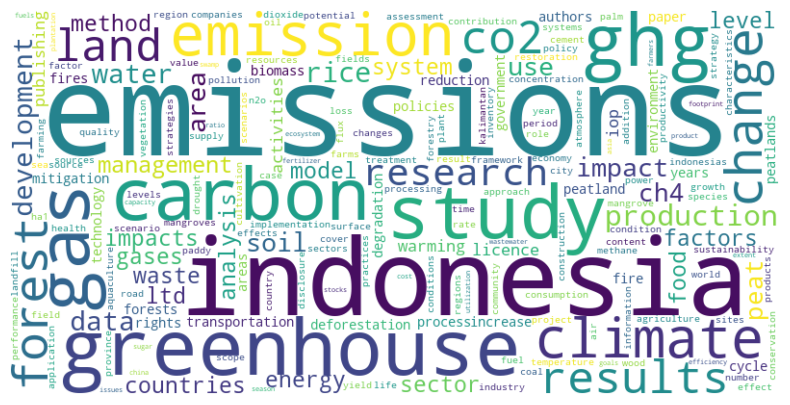

In [ ]:
# Visualisasi WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies['Cluster 2'])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
word_frequencies['Cluster 2']

{'emissions': 463,
 'indonesia': 304,
 'greenhouse': 277,
 'study': 249,
 'gas': 240,
 'carbon': 237,
 'ghg': 235,
 'emission': 228,
 'climate': 201,
 'change': 166,
 'forest': 152,
 'co2': 142,
 'results': 135,
 'land': 131,
 'research': 129,
 'production': 127,
 'rice': 120,
 'water': 109,
 'development': 106,
 'data': 105,
 'use': 100,
 'soil': 97,
 'area': 96,
 'impact': 96,
 'peat': 91,
 'ch4': 91,
 'management': 87,
 'countries': 82,
 'food': 80,
 'impacts': 78,
 'gases': 77,
 'factors': 75,
 'analysis': 74,
 'ltd': 74,
 'energy': 74,
 'sector': 73,
 'system': 73,
 'model': 71,
 'method': 71,
 'waste': 70,
 'level': 67,
 'warming': 66,
 'iop': 65,
 'licence': 64,
 'activities': 64,
 'publishing': 62,
 'mitigation': 62,
 'process': 60,
 'rights': 60,
 'transportation': 60,
 'deforestation': 59,
 'forests': 55,
 'reduction': 54,
 'policies': 53,
 'paper': 51,
 'peatland': 51,
 'environment': 51,
 'areas': 50,
 'increase': 49,
 'biomass': 49,
 'authors': 49,
 'degradation': 47,
 'fi

In [ ]:
# Frasa berdasarkan 
kw_model = KeyBERT('paraphrase-multilingual-MiniLM-L12-v2')

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

cluster_texts = {}
for i, abstract_text in enumerate(data):
    cluster_label = cluster_labels[i]
    if cluster_label not in cluster_texts:
        cluster_texts[cluster_label] = []
    cluster_texts[cluster_label].append(abstract_text)

for cluster_label, texts in cluster_texts.items():
    print(f"Cluster {cluster_label}:")
    keywords = kw_model.extract_keywords(texts, keyphrase_ngram_range=(1,2), top_n=5)
    print(keywords, '\n')

Cluster 2:
[[('electricity consumption', 0.5614), ('economy electricity', 0.5436), ('energy use', 0.539), ('power generation', 0.5382), ('energy generation', 0.5361)], [('greenhouse gas', 0.584), ('commitment greenhouse', 0.5465), ('demand co2', 0.5013), ('energy demand', 0.4994), ('contribution electricity', 0.4631)], [('emission sector', 0.5998), ('countries emission', 0.595), ('energyconsuming districts', 0.5641), ('sector energyconsuming', 0.5406), ('energy policy', 0.5297)], [('emissions sources', 0.6434), ('method emissions', 0.5907), ('greenhouse gases', 0.5858), ('emissions ways', 0.58), ('emissions tons', 0.5666)], [('policies energy', 0.5717), ('emissions use', 0.5484), ('policymakers energy', 0.5322), ('energy market', 0.5283), ('energy consumption', 0.5261)], [('buildings co2emissions', 0.5998), ('timber multistorey', 0.5323), ('energy construction', 0.5277), ('building scenarios', 0.5139), ('warming greenhouse', 0.4963)], [('emissions indonesia', 0.663), ('indonesia emissi